## Summary

To apply the technique of time  series analysis using statsmodels package to the problem of predicting customer value.

In [106]:
import time
import sys
sys.path.append('../../common_routines/')

from relevant_functions import (get_train_data,
                                get_test_data,
                                get_all_predictor_cols,
                                get_rel_cols)

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
INPUT_DIR = '../../input/'

In [10]:
ts = time.time()
full_data = get_train_data(INPUT_DIR)
time.time() - ts

5.165726900100708

Text(0.5, 1.0, 'Logarithm of target values')

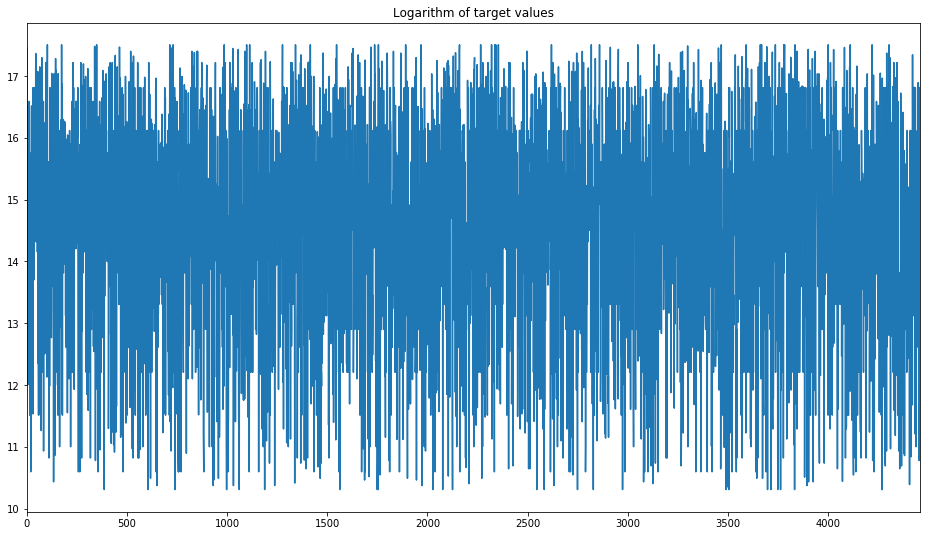

In [11]:
fig , ax = plt.subplots(1, 1, figsize=(16, 9))
full_data['log_target'].plot(ax=ax)
ax.set_title('Logarithm of target values')

In [12]:
full_data.columns

Index(['ID', 'target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115',
       ...
       '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13', '71b203550',
       '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466', 'log_target'],
      dtype='object', length=4994)

In [80]:
validation_frac = 0.2
len_validation_data = int(validation_frac*len(full_data))
validation = full_data[-len_validation_data:]
train = full_data[:-len_validation_data]
assert(len(full_data) == len(train) + len(validation))

In [81]:
len(validation)

891

### Let us fit a VAR model.

Note that we have omitted stationarity test as shortcut, but in reality that should be done.

In [83]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [109]:
rel_cols = get_rel_cols(31, full_data)

In [111]:
cols = ['log_target'] + rel_cols

In [118]:
model = VAR(endog=train[cols])

In [119]:
model_fit = model.fit()

In [120]:
prediction = model_fit.forecast(model_fit.y, steps=len(validation))

In [125]:
predictions_val = np.zeros(len(prediction))
for i in range(len(prediction)):
    predictions_val[i] = prediction[i][0]

14.520796203270713
14.506860011895295
14.506181362838104
14.506870067754623
14.506900532043709
14.506900238813126
14.506899800071519
14.50689979713597
14.50689979957986
14.506899799867316
14.506899799881184
14.506899799879944
14.506899799879674
14.50689979987968
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879681
14.506899799879

In [126]:
mean_squared_error(predictions_val, validation.log_target)

3.321208359442692

### Comments

The score does not look, and hence we do not bother with generating predictions for the test set.